In [ ]:
import numpy as np

# 확인할 .npz 파일 경로를 지정하세요
file_path = 'submodule/CONDOR/src/datasets/LAIR/capricorn/capricorn_0.npy'

data = np.load(file_path, allow_pickle=True)

# 변수 목록 출력
print("Variables in .npz:")

# 변수별 메타정보와 값 출력
for name in data.files:
    arr = data[name]
    print(f"\n=== {name} ===")
    print(f"shape = {arr.shape}, dtype = {arr.dtype}")




Variables in .npz:


AttributeError: 'numpy.ndarray' object has no attribute 'files'

In [20]:
import numpy as np

file_path = 'submodule/CONDOR/src/datasets/LAIR/double_loop/double_loop_0.npy'

# Load the .npy file
data = np.load(file_path, allow_pickle=True)

# Print basic info about the array
print("Loaded .npy file:")
print(f"Type: {type(data)}")
print(f"Shape: {data.shape}")
print(f"Dtype: {data.dtype}")

# If the data contains pickled Python objects (e.g., dict), check type and iterate accordingly
if isinstance(data, dict):
    for key, value in data.items():
        print(f"\n=== {key} ===")
        print(f"Type: {type(value)}")
        if isinstance(value, np.ndarray):
            print(f"Shape: {value.shape}, Dtype: {value.dtype}")
else:
    print(data)


Loaded .npy file:
Type: <class 'numpy.ndarray'>
Shape: (1, 364, 2)
Dtype: float64
[[[106. 276.]
  [107. 276.]
  [108. 275.]
  [110. 275.]
  [111. 274.]
  [113. 273.]
  [114. 273.]
  [116. 272.]
  [117. 272.]
  [118. 271.]
  [120. 270.]
  [122. 269.]
  [124. 269.]
  [125. 268.]
  [126. 267.]
  [127. 266.]
  [129. 266.]
  [130. 265.]
  [132. 263.]
  [134. 262.]
  [136. 261.]
  [138. 260.]
  [140. 259.]
  [144. 258.]
  [146. 257.]
  [149. 256.]
  [153. 254.]
  [158. 253.]
  [161. 252.]
  [165. 251.]
  [169. 250.]
  [172. 250.]
  [175. 249.]
  [178. 249.]
  [181. 248.]
  [184. 248.]
  [187. 248.]
  [190. 248.]
  [192. 247.]
  [195. 247.]
  [197. 247.]
  [200. 247.]
  [203. 247.]
  [206. 247.]
  [209. 247.]
  [213. 248.]
  [216. 249.]
  [219. 250.]
  [222. 252.]
  [224. 253.]
  [226. 254.]
  [228. 255.]
  [230. 257.]
  [231. 258.]
  [232. 259.]
  [234. 261.]
  [235. 262.]
  [237. 264.]
  [239. 266.]
  [239. 268.]
  [240. 270.]
  [241. 272.]
  [242. 273.]
  [242. 275.]
  [242. 276.]
  [242. 

Data preprocessing, demonstration 1 / 7
Data preprocessing, demonstration 2 / 7
Data preprocessing, demonstration 3 / 7
Data preprocessing, demonstration 4 / 7
Data preprocessing, demonstration 5 / 7
Data preprocessing, demonstration 6 / 7
Data preprocessing, demonstration 7 / 7
Mean error spline resampling: 1.5731265496603845e-16


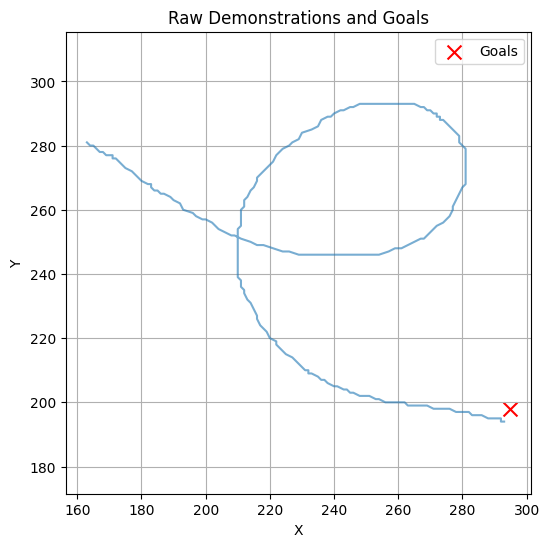

In [23]:
import os
import sys
base_dir = "C:/Users/user/Desktop/기시설/code"

src_path = os.path.join(base_dir, 'submodule', 'CONDOR', 'src')
sys.path.insert(0, src_path)
import matplotlib.pyplot as plt
from submodule.CONDOR.src.data_preprocessing.data_preprocessor import DataPreprocessor
from types import SimpleNamespace

# 1) Params 객체 정의 (필요한 필드만 간략히 작성)
params = SimpleNamespace(
    trajectories_resample_length=100,
    state_increment=0.1,
    workspace_dimensions=2,            # 2D
    dynamical_system_order=1,
    workspace_boundaries_type='from data',
    workspace_boundaries=[[0,0],[0,0]],# unused when 'from data'
    evaluation_samples_length=50,
    dataset_name='LAIR',
    selected_primitives_ids='0',     # 원하는 프리미티브 인덱스
    spline_sample_type='evenly spaced',
    imitation_window_size=10,
    verbose=False
)

# 2) 전처리 객체 생성 및 실행
preprocessor = DataPreprocessor(params)
output = preprocessor.run()

# 3) 원시 궤적과 목표점 가져오기
raw_demos = output['demonstrations raw']       # list of arrays shape (2, T)
goals     = output['goals']                    # array shape (n_primitives, 2)

# 4) 시각화
plt.figure(figsize=(6,6))
for traj in raw_demos:
    x, y = traj[0], traj[1]
    plt.plot(x, y, alpha=0.6)
    break

# 목표점은 붉은 X 마커로
plt.scatter(goals[:,0], goals[:,1], c='r', marker='x', s=100, label='Goals')

plt.title('Raw Demonstrations and Goals')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
raw_demos[6][:,-1]

array([299., 198.])

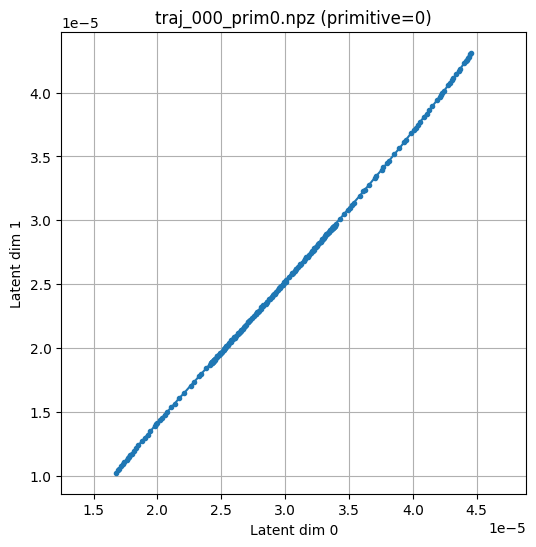

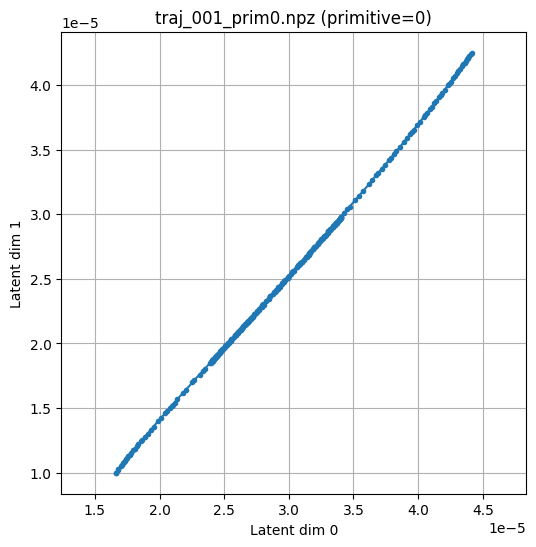

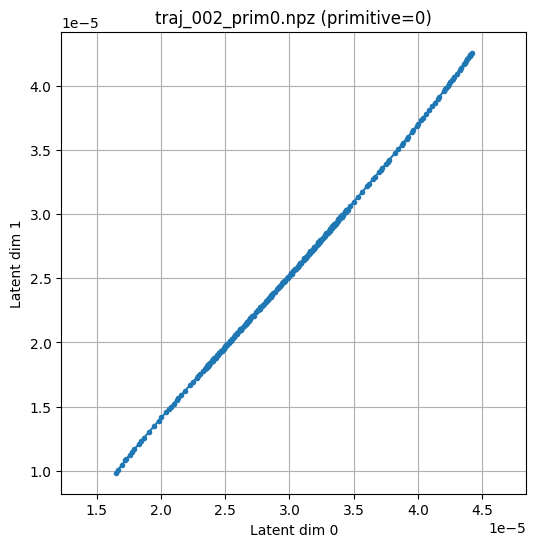

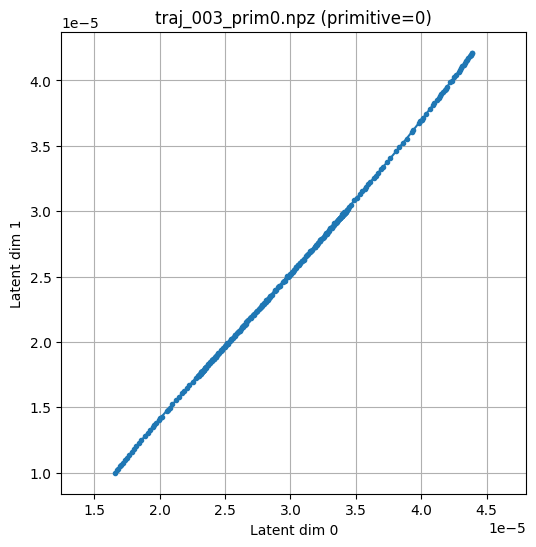

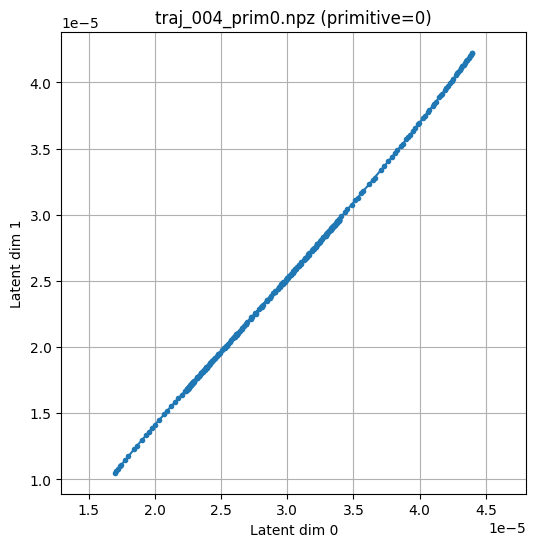

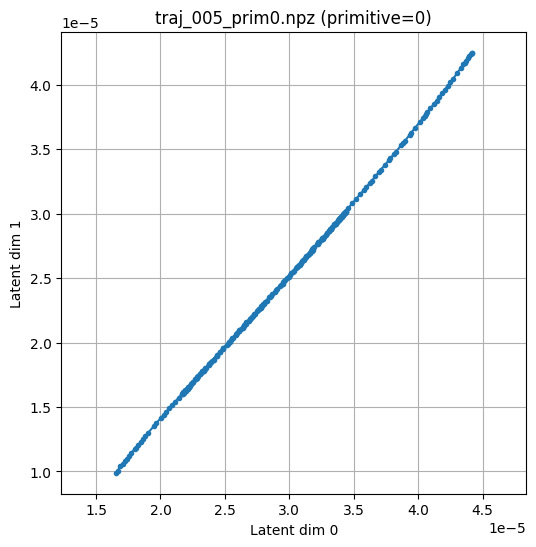

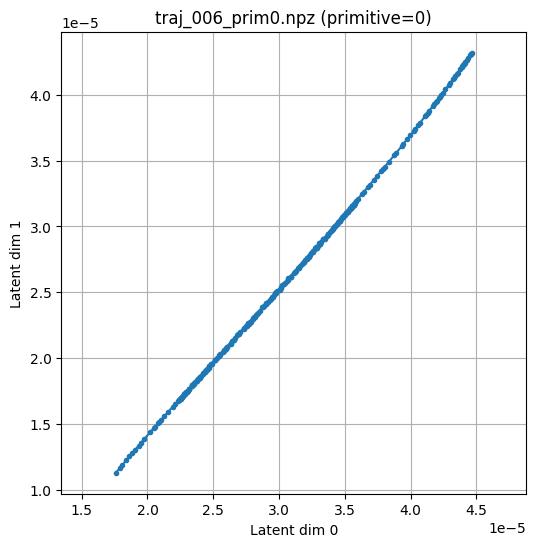

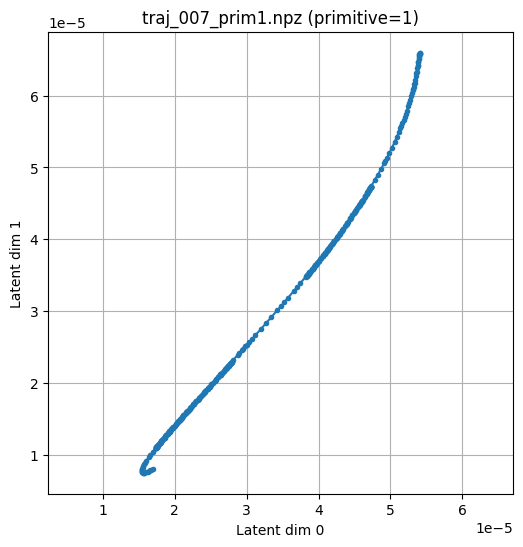

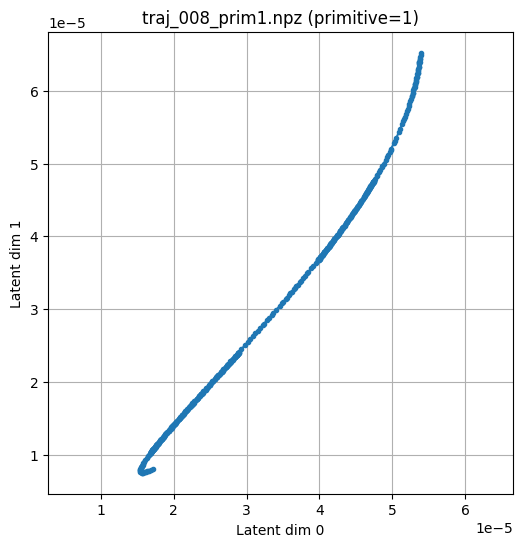

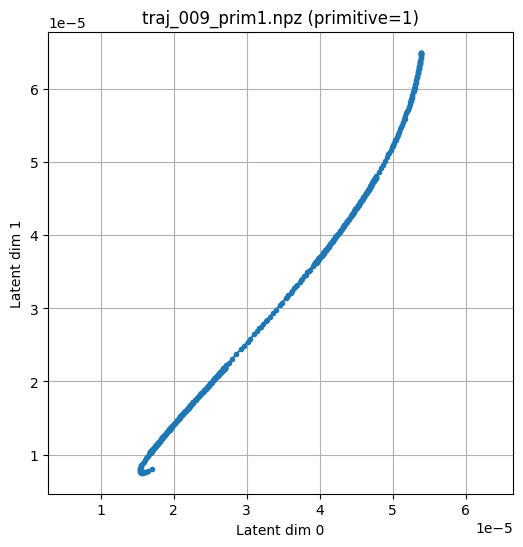

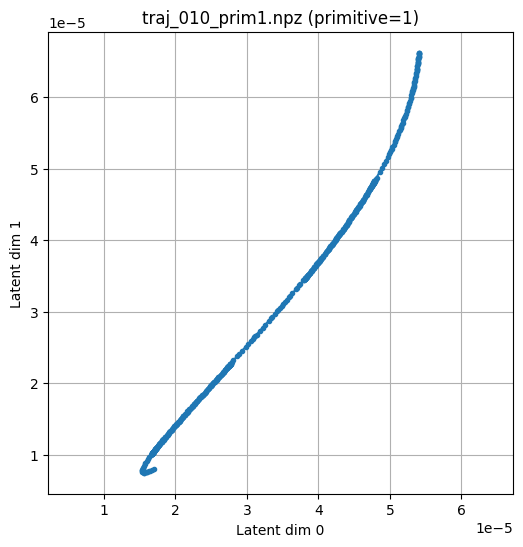

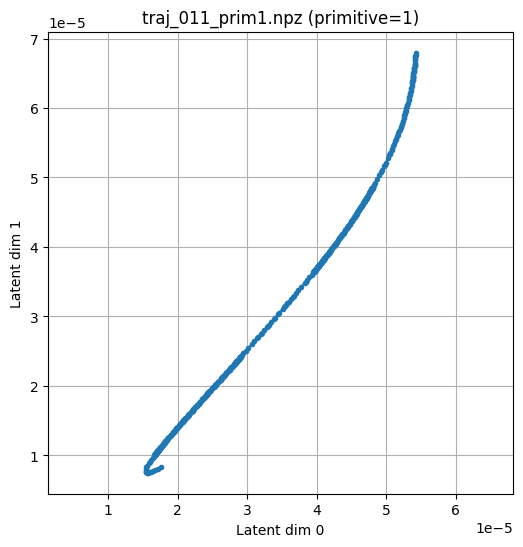

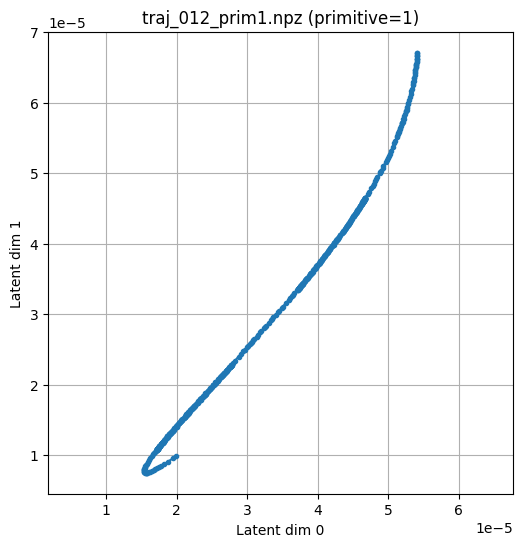

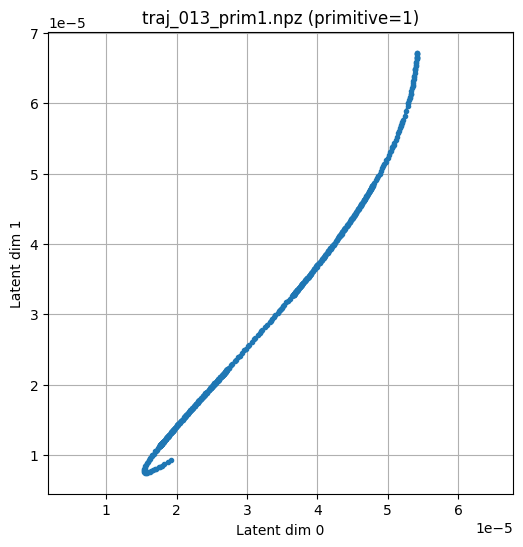

In [3]:



import os
import numpy as np
import matplotlib.pyplot as plt

# 1) 임베딩 파일이 들어있는 디렉토리
emb_dir = 'embeddings_per_traj'  # 혹은 실제 경로

# 2) .npz 파일 목록
files = sorted(f for f in os.listdir(emb_dir) if f.endswith('.npz'))

# 3) 하나씩 그리기
for fname in files:
    path = os.path.join(emb_dir, fname)
    data = np.load(path, allow_pickle=True)
    emb  = data['embeddings']          # (T_i, latent_dim)
    prim = int(data['primitive_id'])    # scalar

    plt.figure(figsize=(6, 6))
    # 잠재 공간 첫 두 차원으로 궤적 형태
    plt.plot(emb[:, 0], emb[:, 1], '-o', markersize=3)
    plt.title(f"{fname} (primitive={prim})")
    plt.xlabel('Latent dim 0')
    plt.ylabel('Latent dim 1')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    input("Press Enter to see the next trajectory...")
